In [4]:
df=pd.read_csv("scores_data.csv")

In [5]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [6]:
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [28]:
df.isnull().sum()

Batch             0
User_ID           0
Score             0
High_Performer    0
dtype: int64

In [11]:
print(df.columns.tolist())


['Batch ', 'User_ID ', '   Score   ']


In [13]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())


['Batch', 'User_ID', 'Score']


In [16]:
df["Score"] = pd.to_numeric(df["Score"], errors="coerce")


In [17]:
batch_stats = df.groupby("Batch")["Score"].agg(
    ["count", "mean", "median", "std", "min", "max"]
).reset_index()

print(batch_stats)


        Batch  count      mean  median       std  min  max
0  AI_ELITE_4     48  3.791667     4.0  1.443376  0.0  7.0
1  AI_ELITE_6     48  4.229167     4.0  1.640441  0.0  7.0
2  AI_ELITE_7     53  5.056604     5.0  1.446682  2.0  7.0


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [23]:
df["High_Performer"] = (df["Score"] >= 5).astype(int)

In [24]:
X = pd.get_dummies(df["Batch"], drop_first=True)
y = df["High_Performer"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67        13
           1       0.80      0.47      0.59        17

    accuracy                           0.63        30
   macro avg       0.68      0.66      0.63        30
weighted avg       0.69      0.63      0.62        30



In [ ]:

# Create target: High performer if Score >= 5
df["High_Performer"] = (df["Score"] >= 5).astype(int)

# Features: Batch (encoded), User_ID (ignored)
X = pd.get_dummies(df["Batch"], drop_first=True)
y = df["High_Performer"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\PrasadMennuli\AppData\Local\Temp\ipykernel_27564\3920719570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Batch", y="Score", data=df, palette="Set2")


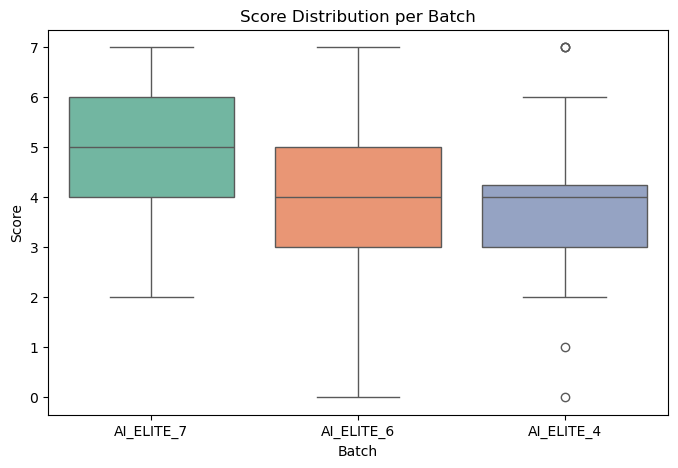

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Batch", y="Score", data=df, palette="Set2")
plt.title("Score Distribution per Batch")
plt.show()

C:\Users\PrasadMennuli\AppData\Local\Temp\ipykernel_27564\3363221191.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Batch", y="Score", data=df, estimator="mean", ci=None, palette="viridis")
C:\Users\PrasadMennuli\AppData\Local\Temp\ipykernel_27564\3363221191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Batch", y="Score", data=df, estimator="mean", ci=None, palette="viridis")


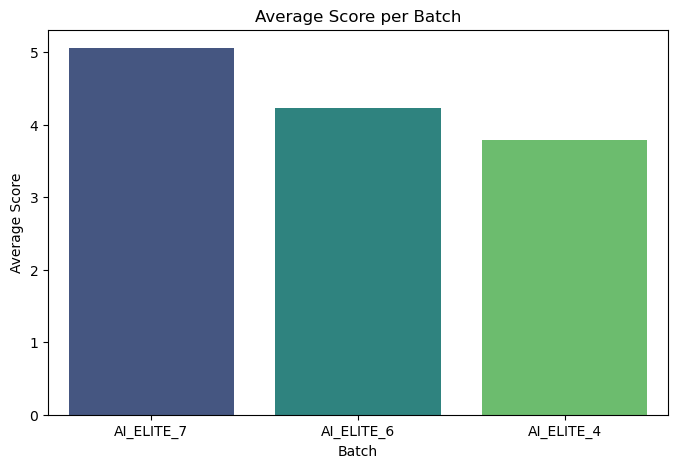

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x="Batch", y="Score", data=df, estimator="mean", ci=None, palette="viridis")
plt.title("Average Score per Batch")
plt.ylabel("Average Score")
plt.show()

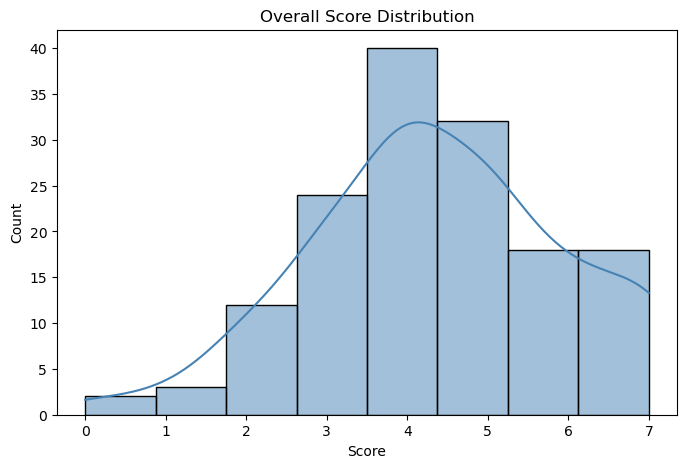

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["Score"], bins=8, kde=True, color="steelblue")
plt.title("Overall Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

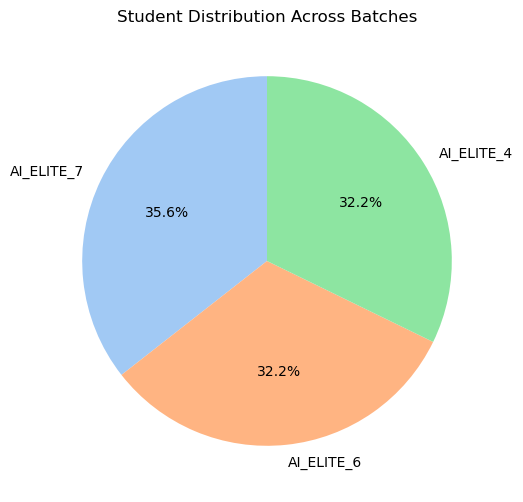

In [21]:
batch_counts = df["Batch"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(batch_counts, labels=batch_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Student Distribution Across Batches")
plt.show()